Prédiction de la consommation d'énergie : Utilisez un ensemble de données CSV
contenant des mesures de consommation d'énergie pour prédire la consommation future à l'aide
de techniques de régression ou de séries temporelles.

# With Linear Regression :

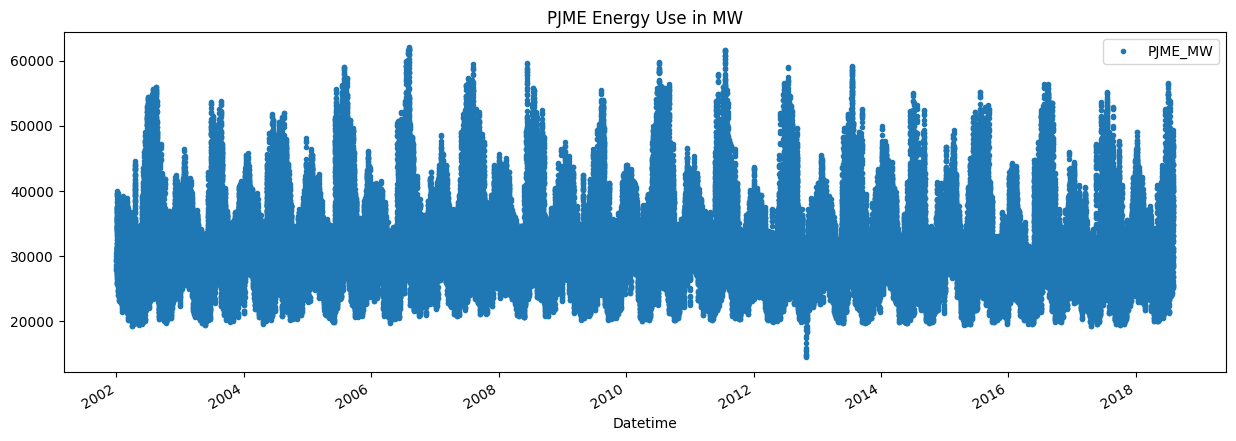

RMSE Score on Test set: 5683.95


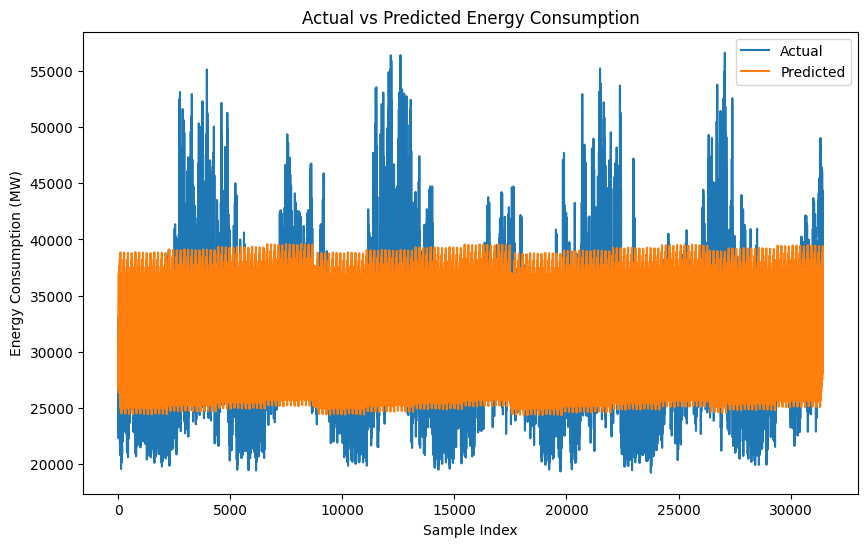

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./PJME_hourly.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')
color_pal = sns.color_palette()

df.plot(style='.', figsize=(15, 5), color=color_pal[0], title='PJME Energy Use in MW')
plt.show()

def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()



# With Random Forest Regressor :

RMSE Score on Test set: 1381.90


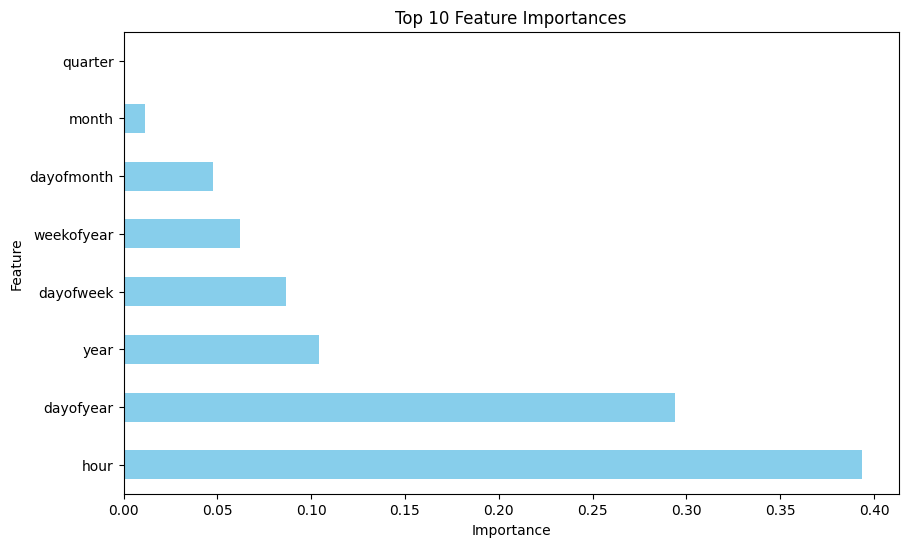

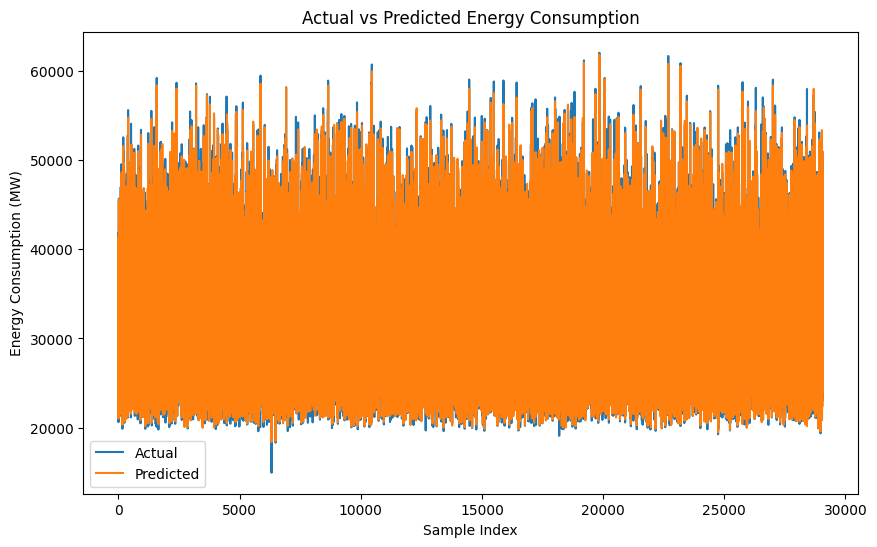

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./PJME_hourly.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

X = df.drop(['PJME_MW'], axis=1)
y = df['PJME_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


# With Neural Network Regression:


Epoch 1/50
2908/2908 [==============================] - 11s 3ms/step - loss: 407729152.0000 - val_loss: 73516000.0000
Epoch 2/50
2908/2908 [==============================] - 11s 4ms/step - loss: 63971336.0000 - val_loss: 31951958.0000
Epoch 3/50
2908/2908 [==============================] - 10s 4ms/step - loss: 49488672.0000 - val_loss: 31152600.0000
Epoch 4/50
2908/2908 [==============================] - 8s 3ms/step - loss: 47121460.0000 - val_loss: 30980188.0000
Epoch 5/50
2908/2908 [==============================] - 9s 3ms/step - loss: 47145264.0000 - val_loss: 31001024.0000
Epoch 6/50
2908/2908 [==============================] - 9s 3ms/step - loss: 46232160.0000 - val_loss: 30976902.0000
Epoch 7/50
2908/2908 [==============================] - 8s 3ms/step - loss: 46048124.0000 - val_loss: 31189796.0000
Epoch 8/50
2908/2908 [==============================] - 9s 3ms/step - loss: 46221216.0000 - val_loss: 31152138.0000
Epoch 9/50
2908/2908 [==============================] - 10s 3ms/step

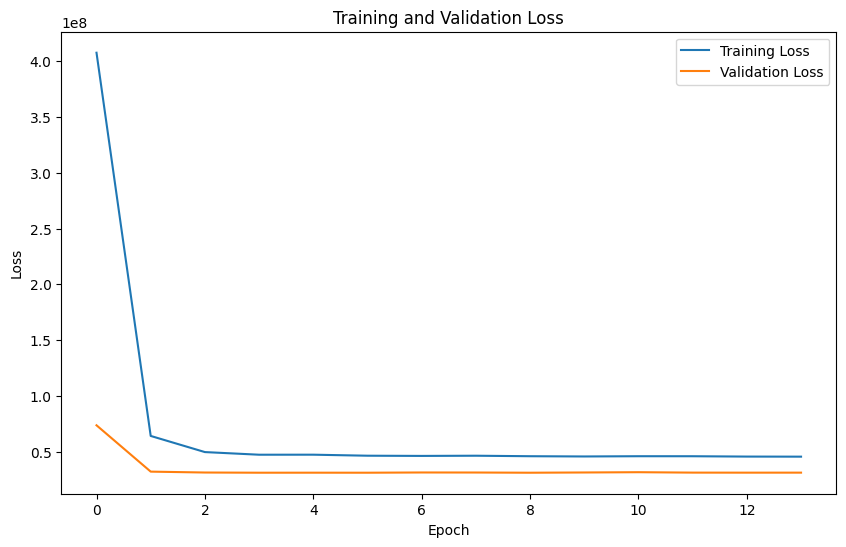

909/909 [==============================] - 1s 2ms/step
RMSE Score on Test set: 5504.23


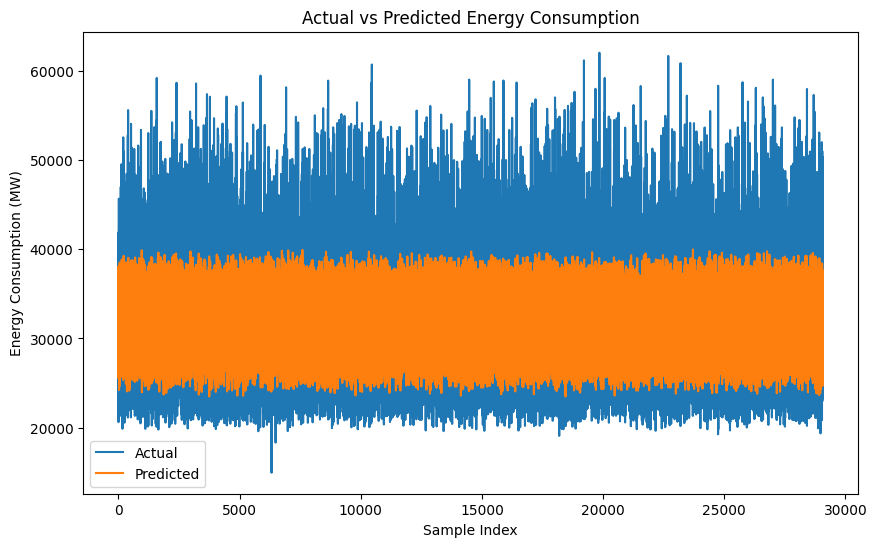

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('./PJME_hourly.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

X = df.drop(['PJME_MW'], axis=1)
y = df['PJME_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


# D) Descripion de l'architecture de reaseau de neurone :
Couche d'entrée (Input Layer) :

Cette couche spécifie la forme de l'entrée du modèle, qui est déterminée par le nombre de caractéristiques dans les données d'entraînement.
Dans ce cas, la forme de l'entrée est définie par le nombre de caractéristiques dans X_train, qui est utilisé pour déterminer le nombre de neurones dans cette couche.



Couches cachées (Hidden Layers) :

Le modèle comporte deux couches cachées, chacune suivie d'une fonction d'activation ReLU (Rectified Linear Unit), qui est couramment utilisée pour introduire de la non-linéarité dans le modèle.
La première couche cachée comporte 64 neurones, et la deuxième couche en a 32.
L'utilisation de plusieurs couches cachées permet au modèle d'apprendre des représentations complexes des données d'entrée.



Couche de régularisation (Dropout Layer) :

Une couche de régularisation Dropout est utilisée après la première couche cachée pour réduire le surajustement (overfitting) en désactivant aléatoirement un pourcentage de neurones pendant l'entraînement.
Dans ce modèle, 50% des neurones sont désactivés aléatoirement pendant l'entraînement.



Couche de sortie (Output Layer) :

Cette couche comporte un seul neurone, car il s'agit d'un problème de régression avec une seule valeur cible (la consommation d'énergie en MW).
Aucune fonction d'activation n'est spécifiée pour la couche de sortie, car le modèle est configuré pour prédire une valeur continue.
Compilation du modèle :

Le modèle est compilé avec l'optimiseur Adam et la fonction de perte (loss function) Mean Squared Error (MSE), qui est couramment utilisée pour les problèmes de régression.
L'optimiseur Adam est choisi pour sa robustesse et son efficacité lors de l'entraînement des réseaux de neurones.



Arrêt précoce (Early Stopping) :

Une technique d'arrêt précoce est utilisée pour surveiller la perte sur l'ensemble de validation et arrêter l'entraînement lorsque la perte sur l'ensemble de validation cesse de diminuer, ce qui aide à éviter le surajustement.

# E) Comparaison des résultats :
-La régression linéaire présente une RMSE (Root Mean Squared Error) de 5683.95. Cela signifie que, en moyenne, les prédictions de ce modèle ont une erreur absolue de 5683.95 unités par rapport aux valeurs réelles.

-Le modèle de forêt aléatoire affiche une RMSE de 1381.90, ce qui est significativement inférieur à celui de la régression linéaire. Cela suggère que le modèle de forêt aléatoire est plus précis dans ses prédictions par rapport aux valeurs réelles.

-Le réseau de neurones a une RMSE de 5504.23, ce qui est similaire à la régression linéaire. Cependant, il est important de noter que la performance du réseau de neurones pourrait être améliorée en ajustant les hyperparamètres du modèle ou en utilisant des architectures de réseau plus complexes.

En résumé, le modèle de forêt aléatoire semble être le plus performant parmi les trois, suivi par le réseau de neurones, tandis que la régression linéaire affiche la moins bonne performance en termes de RMSE.
